In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load the training and testing data MNIST
# Import dataset & split into train and test data
fminst=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fminst.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
len(x_train)
len(y_train)

60000

In [4]:
len(x_test)
len(y_test)

10000

In [5]:
# Shape of the training dataset
x_train.shape

(60000, 28, 28)

In [6]:
# Shape of the testing dataset
x_test.shape

(10000, 28, 28)

In [7]:
# See first Image Matrix
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

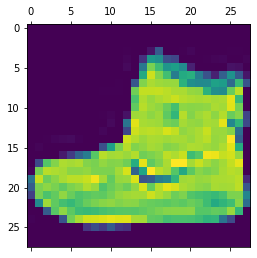

In [8]:
# See first image
plt.matshow(x_train[0])

In [9]:
# Normalize the iamges by scaling pixel intensities to the range 0,1
x_train=x_train/255
x_test=x_test/255
# See first Naormalize Image Matrix
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Define the network architecture using Keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dense(20,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
Total params: 103,060
Trainable params: 103,060
Non-trainable params: 0
_________________________________________________________________


In [11]:
from IPython.core import history
# Compile the Model

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd' ,metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7923 - accuracy: 0.7449 - val_loss: 0.5786 - val_accuracy: 0.8009
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.8225 - val_loss: 0.5239 - val_accuracy: 0.8161
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4755 - accuracy: 0.8367 - val_loss: 0.5033 - val_accuracy: 0.8235
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4503 - accuracy: 0.8441 - val_loss: 0.4657 - val_accuracy: 0.8387
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4321 - accuracy: 0.8499 - val_loss: 0.4613 - val_accuracy: 0.8339
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4182 - accuracy: 0.8554 - val_loss: 0.4424 - val_accuracy: 0.8460
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4058 - accuracy: 0.8586 - val_loss: 0.4304 - val_accuracy:

In [12]:
#Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy =%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4167 - accuracy: 0.8512
Loss=0.417
Accuracy =0.851


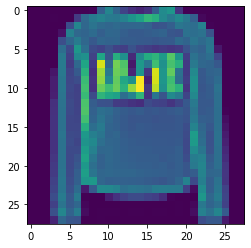

In [13]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [14]:
predicted_value=model.predict(x_test)
print("Image is =%d" %np.argmax(predicted_value[0]))

313/313 [==============================] - 1s 3ms/step
Image is =9


In [15]:
class_labels=["T - shirt / top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels[np.argmax(predicted_value[0])]


'Ankle boot'

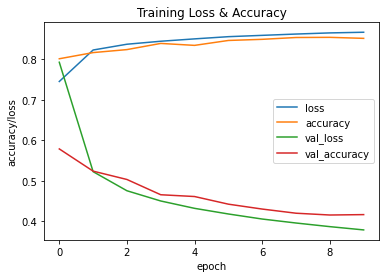

In [16]:
# Plot the training loss and accuracy
history.history.keys()
dict_keys=(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss & Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()